# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация


### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по одному объекту, выбранному случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь для каждой итерации, начиная с нулевой (до первого шага).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
    LinearRegression)

In [3]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [4]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [5]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [6]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [7]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [8]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [9]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 70
pd.options.display.max_columns = 80

In [1]:
# Если файл не скачан, то необходимо раскоментить все и скачать файл 

# import wget
# url = "https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2020-fall/homeworks-practice/homework-practice-03-gd/autos.csv"
# wget.download(url)

In [11]:
df = pd.read_csv('autos.csv')

# Удалим дупликаты 
df.drop_duplicates(inplace = True, ignore_index = True)

# Переименуем названия признаков (дело вкуса)
df.rename(columns={'vehicleType': 'vehicle_type',
                   'notRepairedDamage': 'not_repaired_damage',
                   'fuelType': 'fuel_type',
                   'powerPS': 'power_ps',
                   'yearOfRegistration': 'registration_year',
                   'monthOfRegistration': 'registration_month',
                   'dateCreated': 'creation_date',
                   'lastSeen': 'last_seen',
                   'postalCode': 'post_code'}, 
                    inplace = True)

# Заменим категориальные признаки
df['not_repaired_damage'] = df.not_repaired_damage.apply(lambda x: 1 if x == 'ja' else 0)
df['gearbox'] = df.gearbox.apply(lambda x: 1 if x == 'automatik' else 0)

# Переведем в дату 
df['creation_date'] = pd.to_datetime(df.creation_date)
df['last_seen'] = pd.to_datetime(df.last_seen)

Посчитаем количество дней, потребовавшихся для продажи автомобиля. Возможно это может внести ощутимый вклад в модель. Ведь, если машину купили моментально, то цена могла быть занижена или автомобиль имел редкую модель. Тем не менее, данный признак может иметь влияние на предсказание цены.

In [12]:
df['days_for_sale'] = (df.last_seen - df.creation_date).dt.days

Давайте предположим, что машина не может стоить меньше 300 у.е. (скорее всего Евро, т.к. датасет родом из Германии). Будем считать, что цены ниже 300 евро ориентированы на обмен или на какую-то другую сделку. В противном случае, сдача автомобиля на металлолом принесет больше выгоды, чем продажа за такую стоимость (возможно в Германии другой порядок сдачи автомобиля в металлолом, но в России 1 кг - 17 руб.).

In [13]:
df.drop(df[(df.price < 300)].index, inplace = True)

Также скажем, что, если стоимость машины отличается более чем в 15 раз от средней стоимости такой же машины (такой же `brand`, `model`, `not_repaired_damage`), то такие данные являются выбросами, они должны быть исключены. За исключением машин, где признак `model` = `andere`, что в переводе с немецкого означает 'другая', будем считать, что такие машины уникальны и общее правило на них не распространяется.

In [14]:
mean_price = df.groupby(['brand', 'model', 'not_repaired_damage']).mean()[['price']].reset_index()
df = df.merge(mean_price, on=['brand', 'model', 'not_repaired_damage'], how='left')
df.drop(df[((15 * df.price_x) < df.price_y) | ((df.price_x / 15) > df.price_y) & (df.model != 'andere')].index, 
        inplace = True)

Добавим несколько признаков:
1. признак редкости модели автомобиля (если в графе модель значение `andere`, то это означает, что такой модели нет в справочнике eBay или почему продавец ее не указал, возможно, такая машина стоит дороже или дешевле похожих автомобилей);
2. признак раритетного автомобиля (если у машины год выпуска меньше 1985, то автомобиль раритетный и цена не будет подчиняться обычной закономерности);
3. признак новой машины (будем считать, что автомобиль новый начиная с 2014 года (датасет за 2016 год)).

In [15]:
df['rare_model'] = 0
df['rare_model'][df.model == 'andere'] = 1

df['rarity'] = 0
df.rarity[df.registration_year < 1985] = 1

df['new_car'] = 0 
df['new_car'][df.registration_year > 2013] = 1

Предположим, что территориальный признак может влиять на цену. Поделим Германию на 9 зон. В почтовом коде первая цифра - зона, вторая - регион, 3-5 - город. Потом будем кодировать данный признак при помощи OneHotEncoder

In [16]:
df['post_code'] = df.post_code.astype(str).str[0].astype(int)

Заменим таргет на его логарифм, также удалим признаки, которые мы добавили, при сравнении цены автомобиля со средней ценой по рынку.

In [17]:
df['log_price'] = np.log(df.price_x)
df.drop(columns=['price_x', 'price_y'], inplace = True)

Переиндексируем записи, в результате удаления некоторых записей индекс сбился.

In [18]:
df = df.reset_index().drop(columns = 'index')

Поскольку линейная регрессия не может работать с текстовыми данными, то будем кодировать категориальные признаки. При этом для кодировки `fuel_type`, `vehicle_type`, `brand`, `post_code` воспользуемся OneHotEncoder. Поскольку вариантов принимаемых значений для этих признаков не так много, OneHotEncoder не добавит слишком много новых признаков. Однако такие признаки позволят нам восстановить нелинейную зависимость.

При помощи LabelEncoder закодируем `model`. Данный признак принимает очень много различных значений. Если закодировать такой признак через OneHotEncoder у нас появится очень много новых признаков, которые скорее всего окажутся малозначимыми. Не стоит забывать, что после LabelEncoder следует воспользоваться StandardScaler.

Отмасштабируем при помощи StandardScaler следующие признаки: `power_ps`, `kilometer`, `registration_year`, `registration_month`, `days_for_sale`. StandardScaler позволит нашей модели быстрее обучаться.

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

# Масштабирование
scaler = StandardScaler()

# power_ps
power_ps = scaler.fit_transform(df.power_ps.values.reshape(-1, 1))
df['power_ps'] = power_ps

# kilometer
kilometer = scaler.fit_transform(df.kilometer.values.reshape(-1, 1))
df['kilometer'] = kilometer

# registration_year
registration_year = scaler.fit_transform(df.registration_year.values.reshape(-1, 1))
df['registration_year'] = registration_year

# registration_month
registration_month = scaler.fit_transform(df.registration_month.values.reshape(-1, 1))
df['registration_month'] = registration_month

# days_for_sale
days_for_sale = scaler.fit_transform(df.days_for_sale.values.reshape(-1, 1))
df['days_for_sale'] = days_for_sale

# Лейблинг и масштабирование

le = LabelEncoder()

# model
model_label = le.fit_transform(df.model)
model_label = scaler.fit_transform(model_label.reshape(-1, 1))
df['model_label'] = model_label

# Энкодинг

enc = OneHotEncoder(drop='first', sparse=False)

# fuel_type
fuel_type = enc.fit_transform(df.fuel_type.values.reshape(-1, 1))
hot_fuel_type = pd.DataFrame(fuel_type, columns=['fuel_type=' + str(i+1) for i in range(fuel_type.shape[1])])

# vehicle_type
vehicle_type = enc.fit_transform(df.vehicle_type.values.reshape(-1, 1))
hot_vehicle_type = pd.DataFrame(vehicle_type, columns=['vehicle_type=' + str(i+1) for i in range(vehicle_type.shape[1])])

# brand
brand = enc.fit_transform(df.brand.values.reshape(-1, 1))
hot_brand = pd.DataFrame(brand, columns=['brand=' + str(i+1) for i in range(brand.shape[1])])

# post_code
post_code = enc.fit_transform(df.post_code.values.reshape(-1, 1))
hot_post_code = pd.DataFrame(post_code, columns=['post_code=' + str(i+2) for i in range(post_code.shape[1])])

df = pd.concat([df, hot_fuel_type, hot_vehicle_type, hot_brand, hot_post_code], axis=1)

Удалим признаки, которыми мы больше не будем пользоваться 

In [20]:
df.drop(columns = ['brand', 'model', 'vehicle_type', 'fuel_type', 'creation_date', 'last_seen', 'post_code'], 
        inplace = True)

Разобьем данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1. Разобьем данные сначала на предобработку и тестовую выборку в соотношении 4:1. Предобработку разобьем на обучающую и валидационную выборку в соотношении 3:1. В итоге имеет распределение 3:1:1.

In [21]:
from sklearn.model_selection import train_test_split

features = df.drop(columns = 'log_price')
targer = df.log_price

x, test_features, y, test_target = train_test_split(features, targer, train_size=0.8, test_size=0.2, random_state = 100)

train_features, validation_features, train_target, validation_target = train_test_split(x, y, 
                                                                                        train_size = 0.75,
                                                                                        test_size = 0.25,
                                                                                        random_state = 100)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [22]:
from sklearn.metrics import r2_score, mean_squared_error
from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
    LinearRegression
)

w0 = np.zeros(train_features.shape[1])

Для наглядности сравнения создадим датафрейм в который будем вписывать результаты ($\lambda$, MSE, $R^2$, Number of iterations for convergence) по каждому методу.

In [23]:
GD_comparison = pd.DataFrame(columns = ['gradient_type', 'best_lambda', 'MSE', 'r_2', 'iterations_for_convergence'])

Будем считать, что 15 значений в логарифмической сетке достаточно для подбора лучшего параметра $\lambda$. Тем более точное значение искать нам не требуется.

In [24]:
# Логарифмическая сетка
log_net = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым "плохим" MSE будет значение равное 1000
Best_MSE = 1000

# Gradient Descent
for lambda_ in log_net:
    GD = LinearRegression(GradientDescent(w0, lambda_))
    GD.fit(train_features, train_target)
    prediction = GD.predict(validation_features)
    MSE = mean_squared_error(validation_target, prediction)
    if MSE < Best_MSE:
        Best_MSE = MSE
        Best_lambda_for_GD = lambda_

# Обучим метод с наилучшим параметром lambda
GD = LinearRegression(GradientDescent(w0, Best_lambda_for_GD))
GD.fit(train_features, train_target)
prediction = GD.predict(test_features)

# Запишем значения R^2 и MSE, они нам еще пригодятся для 8-го задания
R2_GD = r2_score(test_target, prediction)
MSE_GD = mean_squared_error(test_target, prediction)

print('R^2 score - {}.'.format(R2_GD))
print('Mean squared error - {}.'.format(MSE_GD))
print('Number of iterations for convergence - {}'.format(len(GD.loss_history)))

# Запишем данные для сравнения
GD_comparison.loc[0] = ['Gradient Descent', Best_lambda_for_GD, MSE_GD, R2_GD, len(GD.loss_history)]

R^2 score - 0.6712883307606048.
Mean squared error - 0.38497046463041346.
Number of iterations for convergence - 69


In [40]:
# Логарифмическая сетка
log_net = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым "плохим" MSE будет значение равное 1000
Best_MSE = 1000

# Stochastic Gradient Descent
for lambda_ in log_net:
    SGD = LinearRegression(StochasticDescent(w0, lambda_))
    SGD.fit(train_features.values, train_target.values)
    prediction = SGD.predict(validation_features.values)
    MSE = mean_squared_error(validation_target.values, prediction)
    if MSE < Best_MSE:
        Best_MSE = MSE
        Best_lambda_for_SGD = lambda_

# Обучим метод с наилучшим параметром lambda
SGD = LinearRegression(StochasticDescent(w0, Best_lambda_for_SGD))
SGD.fit(train_features.values, train_target.values)
prediction = SGD.predict(test_features.values)

# Запишем значения R^2 и MSE, они нам еще пригодятся для 8-го задания
R2_SGD = r2_score(test_target, prediction)
MSE_SGD = mean_squared_error(test_target, prediction)

print('R^2 score - {}.'.format(R2_SGD))
print('Mean squared error - {}.'.format(MSE_SGD))
print('Number of iterations for convergence - {}'.format(len(SGD.loss_history)))

# Запишем данные для сравнения
GD_comparison.loc[1] = ['Stochastic Gradient Descent', Best_lambda_for_SGD, MSE_SGD, R2_SGD, len(SGD.loss_history)]

R^2 score - -4.752178726907487.
Mean squared error - 6.736660497203193.
Number of iterations for convergence - 40


Для `Stochastic Gradient Descent` у нас получился достаточно плохой результат. Причиной скорее всего является:
1. Разреженность категориальных признаков после кодирования
2. Слишком большое значение критерия остановы - `tolerance`
3. Недостаточное количество итераций

Давайте в качестве альтернативы попробуем изменить параметры `tolerance` и `max_iter`, посмотрим на сколько наша модель  может улучшиться.

In [26]:
# Обучим метод с наилучшим параметром lambda
SGD_alt = LinearRegression(StochasticDescent(w0, Best_lambda_for_SGD), max_iter = 1500, tolerance = 1e-11)
SGD_alt.fit(train_features.values, train_target.values)
prediction = SGD_alt.predict(test_features.values)

# Запишем значения R^2 и MSE
R2_SGD_alt = r2_score(test_target, prediction)
MSE_SGD_alt = mean_squared_error(test_target, prediction)

print('R^2 score - {}.'.format(R2_SGD_alt))
print('Mean squared error - {}.'.format(MSE_SGD_alt))
print('Number of iterations for convergence - {}'.format(len(SGD_alt.loss_history)))

# Запишем данные для сравнения
GD_comparison.loc[2] = ['Stochastic Gradient Descent Alternative', Best_lambda_for_SGD, MSE_SGD_alt, 
                        R2_SGD_alt, len(SGD_alt.loss_history)]

R^2 score - -0.194812089285199.
Mean squared error - 1.3993034266853839.
Number of iterations for convergence - 1500


In [27]:
# Логарифмическая сетка
log_net = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым "плохим" MSE будет значение равное 1000
Best_MSE = 1000

# Momentum Descent
for lambda_ in log_net:
    MD = LinearRegression(MomentumDescent(w0, lambda_))
    MD.fit(train_features, train_target)
    prediction = MD.predict(validation_features)
    MSE = mean_squared_error(validation_target, prediction)
    if MSE < Best_MSE:
        Best_MSE = MSE
        Best_lambda_for_MD = lambda_

# Обучим метод с наилучшим параметром lambda
MD = LinearRegression(MomentumDescent(w0, Best_lambda_for_MD))
MD.fit(train_features, train_target)
prediction = MD.predict(test_features)

# Запишем значения R^2 и MSE, они нам еще пригодятся для 8-го задания
R2_MD = r2_score(test_target, prediction)
MSE_MD = mean_squared_error(test_target, prediction)

print('R^2 score - {}.'.format(R2_MD))
print('Mean squared error - {}.'.format(MSE_MD))
print('Number of iterations for convergence - {}'.format(len(MD.loss_history)))

# Запишем данные для сравнения
GD_comparison.loc[3] = ['Momentum Descent', Best_lambda_for_MD, MSE_MD, R2_MD, len(MD.loss_history)]

R^2 score - 0.6660126685106343.
Mean squared error - 0.3911490531554383.
Number of iterations for convergence - 52


In [28]:
# Логарифмическая сетка
log_net = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым "плохим" MSE будет значение равное 1000
Best_MSE = 1000

# Adagrad
for lambda_ in log_net:
    AdaG = LinearRegression(Adagrad(w0, lambda_))
    AdaG.fit(train_features, train_target)
    prediction = AdaG.predict(validation_features)
    MSE = mean_squared_error(validation_target, prediction)
    if MSE < Best_MSE:
        Best_MSE = MSE
        Best_lambda_for_AdaG = lambda_

# Обучим метод с наилучшим параметром lambda
AdaG = LinearRegression(Adagrad(w0, Best_lambda_for_AdaG))
AdaG.fit(train_features, train_target)
prediction = AdaG.predict(test_features)

# Запишем значения R^2 и MSE, они нам еще пригодятся для 8-го задания
R2_AdaG = r2_score(test_target, prediction)
MSE_AdaG = mean_squared_error(test_target, prediction)

print('R^2 score - {}.'.format(R2_AdaG))
print('Mean squared error - {}.'.format(MSE_AdaG))
print('Number of iterations for convergence - {}'.format(len(AdaG.loss_history)))

# Запишем данные для сравнения
GD_comparison.loc[4] = ['Adaptive Gradient Descent', Best_lambda_for_AdaG, MSE_AdaG, R2_AdaG, len(AdaG.loss_history)]

R^2 score - 0.5446022443516063.
Mean squared error - 0.5333387950274769.
Number of iterations for convergence - 50


In [41]:
GD_comparison

,gradient_type,best_lambda,MSE,r_2,iterations_for_convergence
0,Gradient Descent,3.500000,0.384970,0.671288,69
1,Stochastic Gradient Descent,0.059161,6.736660,-4.752179,40
2,Stochastic Gradient Descent Alternative,0.189815,1.399303,-0.194812,1500
3,Momentum Descent,3.500000,0.391149,0.666013,52
4,Adaptive Gradient Descent,3.500000,0.533339,0.544602,50


Лучшими методами для наших данных оказались `Gradient Descent`, `Momentum Descent`. Однако при схожих значениях MSE `Momentum Descent` требуется меньшее количество итераций для сходимости.

Следует заметить, что `Stochastic Gradient Descent` требуется меньше пороговое значение `tolerance` для того чтобы показывать адекватные значения. Однако при уменьшении `tolerance` `Stochastic Gradient Descent` все равно показывает результаты хуже, чем любой другой метод. Мы в этом убедились на примере `Stochastic Gradient Descent Alternative`. Главная причина таких результатов - разреженность данных.

Нельзя не заметить, что `Gradient Descent`, `Momentum Descent`, `Adaptive Gradient Descent` выбирают очень большие значения $\lambda$. Если для `Adaptive Gradient Descent` это не вызывает никаких аномалий (далее убедимся в этом на графике), то для `Gradient Descent`, `Momentum Descent` это приводит к слишком большим шагам из-за которых такие модели поначалу расходятся (функция потерь увеличивается), а потом сходятся. `Gradient Descent`, `Momentum Descent` вынуждены выбирать слишком большое значение $\lambda$ для того чтобы компенсировать слишком большое пороговое значение параметра `tolerance`. Моделям выгоднее сначала расходиться в такой ситуации, нежели сразу сходиться. Если у нас была бы возможность уменьшить `tolerance` для таких моделей (ограничение по условию задачи), то модели сразу бы предпочли двигаться в сторону уменьшения функции ошибки.

Построим график зависимости числа итераций от функции ошибки.

In [30]:
import seaborn as sns
sns.set_palette("bright") 
import matplotlib.pyplot as plt

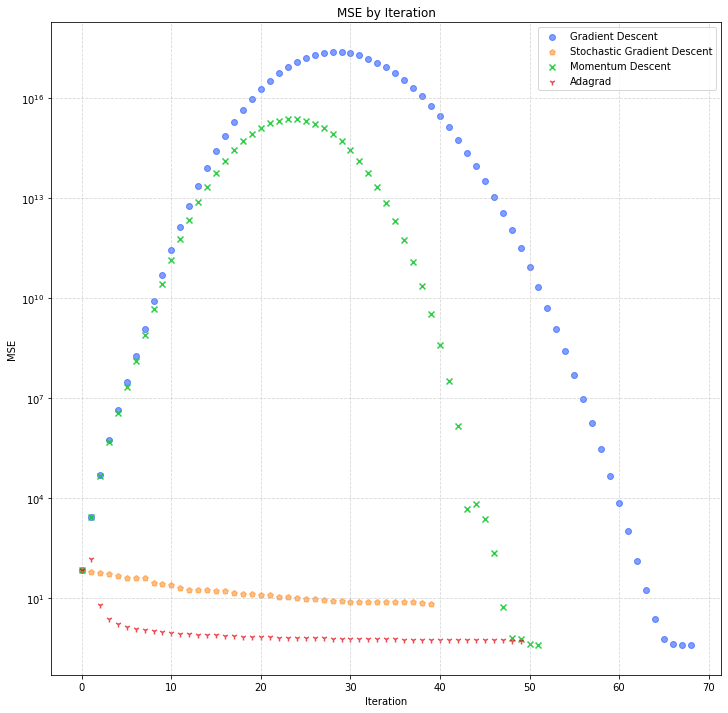

In [56]:
fig, ax = plt.subplots(figsize=(12,12))

ax.set_title('MSE by Iteration')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration')
ax.scatter(x=range(len(GD.loss_history)), y=GD.loss_history, marker='o', alpha = 0.5)
ax.scatter(x=range(len(SGD.loss_history)), y=SGD.loss_history, marker='p', alpha = 0.5)
ax.scatter(x=range(len(MD.loss_history)), y=MD.loss_history, marker='x', alpha = 0.9)
ax.scatter(x=range(len(AdaG.loss_history)), y=AdaG.loss_history, marker='1', alpha = 0.7)
# при логарифмическом масштабе график выглядит нагляднее
plt.yscale('log')
ax.legend(['Gradient Descent','Stochastic Gradient Descent','Momentum Descent', 'Adagrad'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Как и было сказано раньше, ограничение в отношении `tolerance` сильно искажает `Gradient Descent`, `Momentum Descent`, в следствии чего данные модели сначала увеличивают функцию ошибки, а потом ее уменьшают.

Также видно, что `Adaptive Gradient Descent` при большой $\lambda$ не подвержен таким же проблемах как `Gradient Descent` и `Momentum Descent`.

`Stochastic Gradient Descent` из-за разреженности данных со стандартными параметрами сходится слишком далеко от точки минимума.

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

Пусть `k` = 5, если `k` поставить еще больше наша модель будет очень долго обучаться. При `k` = 5 наша модель будет обучаться уже 250 раз.

In [32]:
import time
batch_sizes = np.arange(5, 500, 10)

# Создадим датафрейм, куда будем записывать результаты 
SGD_batch = pd.DataFrame(columns = ['batch_size', 'iteration_number', 'iterations', 'time', 'MSE'])
i = 0
for batch in batch_sizes:
    for k in range(5):
        start = time.time()
        SGD_b = LinearRegression(StochasticDescent(w0, Best_lambda_for_SGD, batch_size = batch))
        SGD_b.fit(np.array(train_features), np.array(train_target))
        prediction = SGD_b.predict(validation_features)
        MSE = mean_squared_error(validation_target, prediction)
        
        # Запишем результат 
        SGD_batch.loc[i] = [batch, k, len(SGD_b.loss_history), time.time() - start, MSE]
        i += 1

Объединим данные, найдем среднии и дисперсии. 

In [33]:
SGD_group = SGD_batch.groupby(['batch_size']).agg(['mean', np.var])[['time', 'iterations', 'MSE']].reset_index()

Построим графики, отобразим на графиках разброс между данными в виде среднего квадратического отклонения.

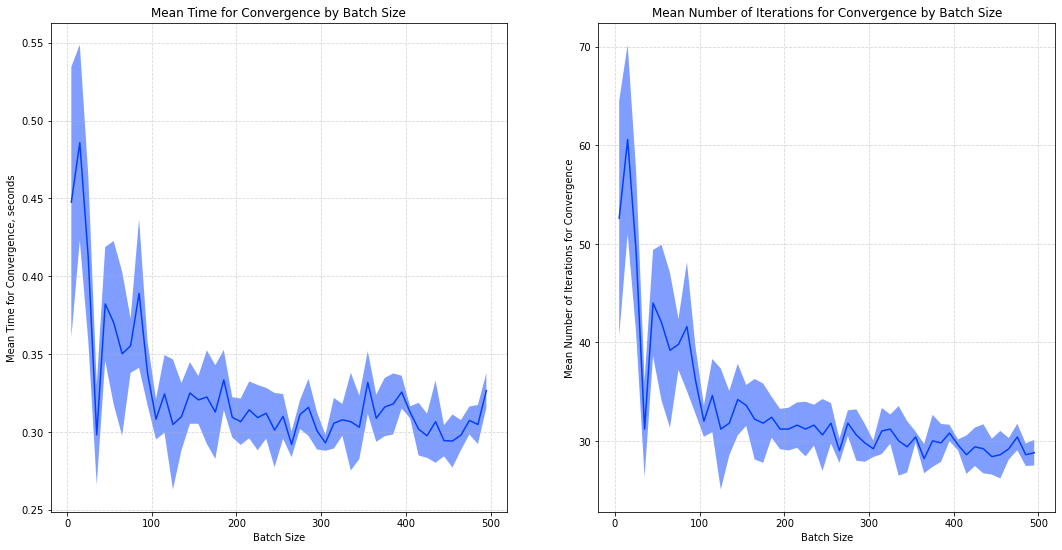

In [34]:
plt.figure(figsize=(18, 9))

ax = plt.subplot(121)
ax.set_title('Mean Time for Convergence by Batch Size')
ax.set_ylabel('Mean Time for Convergence, seconds')
ax.set_xlabel('Batch Size')
plt.plot(SGD_group.iloc[:, 0], SGD_group.iloc[:, 1])
# воспользуемся данными дисперсий, и отобразим на графике разброс в виде среднеквадратического отклонения 
plt.fill_between(SGD_group.iloc[:, 0], SGD_group.iloc[:, 1] - np.sqrt(SGD_group.iloc[:, 2]), 
                 SGD_group.iloc[:, 1] + np.sqrt(SGD_group.iloc[:, 2]), alpha = 0.5)  
plt.grid(linestyle='--', alpha=0.5)

ax = plt.subplot(122)
ax.set_title('Mean Number of Iterations for Convergence by Batch Size')
ax.set_ylabel('Mean Number of Iterations for Convergence')
ax.set_xlabel('Batch Size')
plt.plot(SGD_group.iloc[:, 0], SGD_group.iloc[:, 3])
# воспользуемся данными дисперсий, и отобразим на графике разброс в виде среднеквадратического отклонения 
plt.fill_between(SGD_group.iloc[:, 0], SGD_group.iloc[:, 3] - np.sqrt(SGD_group.iloc[:, 4]), 
                 SGD_group.iloc[:, 3] + np.sqrt(SGD_group.iloc[:, 4]), alpha = 0.5)  
plt.grid(linestyle='--', alpha=0.5)

plt.show()

Построим два графика распределения дисперсии в зависимости от размера батча.

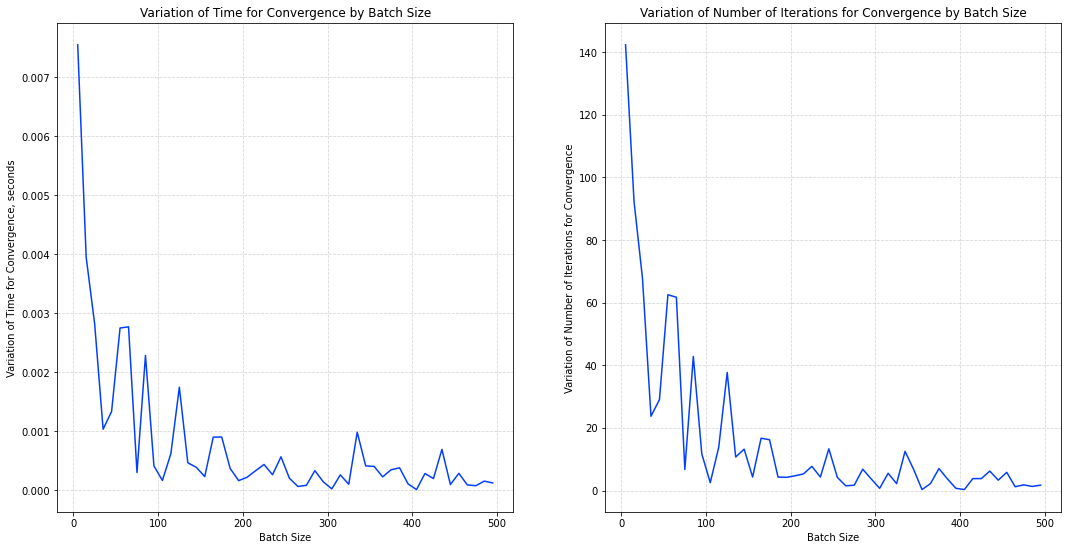

In [35]:
plt.figure(figsize=(18, 9))

ax = plt.subplot(121)
ax.set_title('Variation of Time for Convergence by Batch Size')
ax.set_ylabel('Variation of Time for Convergence, seconds')
ax.set_xlabel('Batch Size')
plt.plot(SGD_group.iloc[:, 0], SGD_group.iloc[:, 2])
plt.grid(linestyle='--', alpha=0.5)

ax = plt.subplot(122)
ax.set_title('Variation of Number of Iterations for Convergence by Batch Size')
ax.set_ylabel('Variation of Number of Iterations for Convergence')
ax.set_xlabel('Batch Size')
plt.plot(SGD_group.iloc[:, 0], SGD_group.iloc[:, 4])
plt.grid(linestyle='--', alpha=0.5)

plt.show()

На графиках дисперсии видно, что при увеличении размера батча дисперсия уменьшается в разы. Хотя дисперсия времени до сходимости и уменьшается, но если обратить внимание на единицу измерения, то можно сказать, что изменение не существенно. Дисперсия количества итераций до сходимости при увеличении батча снижается существенно.

Нельзя не отметить, что графики дисперсий очень похожи, а это значит, что между временем до сходимости и количеством итераций существует сильная взаимосвязь.

Давайте построим еще один график и посмотрим, что происходит с функцией ошибки. Как она зависит от размера батча.

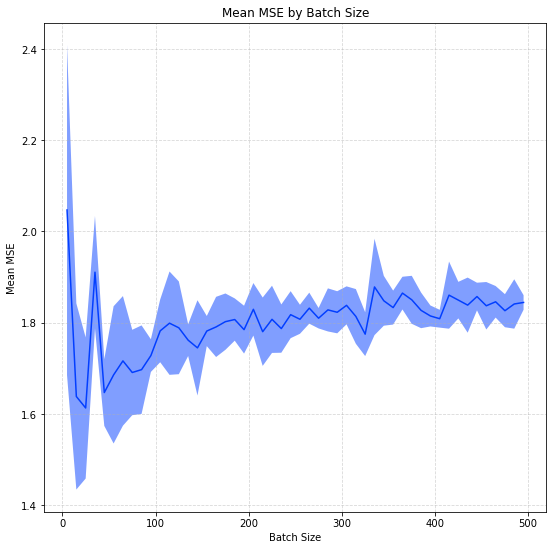

In [36]:
fig, ax = plt.subplots(figsize=(9,9))

ax.set_title('Mean MSE by Batch Size')
ax.set_ylabel('Mean MSE')
ax.set_xlabel('Batch Size')
plt.plot(SGD_group.iloc[:, 0], SGD_group.iloc[:, -2])
# воспользуемся данными дисперсий, и отобразим на графике разброс в виде среднеквадратического отклонения 
plt.fill_between(SGD_group.iloc[:, 0], SGD_group.iloc[:, -2] - np.sqrt(SGD_group.iloc[:, -1]), 
                 SGD_group.iloc[:, -2] + np.sqrt(SGD_group.iloc[:, -1]), alpha = 0.5)  
plt.grid(linestyle='--', alpha=0.5)

plt.show()

Прежде всего следует отметить, что независимо от размера батча `Stochastic Gradient Descent` показывает результаты хуже любого из ранее рассмотренных методов. Что непосредственно говорит о том, что данный метод не подходит для наших данных.

На графике зависимости времени сходимости от размера батча видно, что при увеличении батча до определенного значения `Stochastic Gradient Descent` будет сходится быстрее, нежели если брать маленький батч.

Также следует заметить, что сходимость `Stochastic Gradient Descent` достигается за меньшее количество итераций при увеличении батча. На графиках присутствует среднеквадратическое отклонение (корень из дисперсии) в виде зоны, окружающей основную линию графика. По ней можно судить о том, что при очень маленьком размере батча дисперсия очень большая, что говорит нам о нестабильных результатах. При множественном запуске, каждый раз мы можем получить разное значение. При увеличении размера батча видно, что дисперсия нормализуется и разброс в данных не такой большой, как при маленьком размере батча. Чем меньше дисперсия, тем стабильнее результаты.

Анализируя графики совместно, видно, что уменьшение количества итераций путем увеличения размера батча еще не свидетельствует о скорости сходимости метода. Ведь при слишком большом батче, действительно, уменьшается количество итераций, однако время на одну итерацию в таком случае увеличивается.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{1}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [37]:
%autoreload 2

from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

Будем использовать логарифмическую сетку для определения лучшего гиперпараметра $\alpha$ на подобии той, что мы использовали в **Задании 5**. Будем считать, что 10 различных значений $\alpha$ будет достаточно для подбора оптимального гиперпараметра. Сетку для подбора лучшего параметра $\lambda$ доставим без изменения.

In [43]:
# Логарифмическая сетка alpha
log_net_alpha = np.logspace(np.log(0.001), np.log(1), num = 10, base = np.e)
# Логарифмическая сетка lambda
log_net_lambda = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым плохим MSE будет значение равное 1000
Best_MSE = 1000
# Gradient Descent with Regularization
for alpha in log_net_alpha:
    for lambda_ in log_net_lambda:
        GD_reg = LinearRegression(GradientDescentReg(w0, lambda_, mu = alpha))
        GD_reg.fit(train_features, train_target)
        prediction = GD_reg.predict(validation_features)
        MSE = mean_squared_error(validation_target, prediction)
        if MSE < Best_MSE:
            Best_MSE = MSE
            Best_alpha_for_GD = alpha
            Best_lambda_for_GD_reg = lambda_

# Обучим метод с наилучшими параметрами alpha и lambda
GD_reg = LinearRegression(GradientDescentReg(w0, Best_lambda_for_GD_reg, Best_alpha_for_GD))
GD_reg.fit(train_features, train_target)
prediction = GD_reg.predict(test_features)

# Запишем значения R^2 и MSE
R2_GD_reg = r2_score(test_target, prediction)
MSE_GD_reg = mean_squared_error(test_target, prediction)

# Сравним MSE и R^2
print('Best alpha - {}'.format(Best_alpha_for_GD))
print('Best lambda without regularization - {} vs {} - Best lambda with regularization'.format(Best_lambda_for_GD,
                                                                                               Best_lambda_for_GD_reg))
print('R^2 score without regularization - {} vs {} - R^2 score with regularization'.format(R2_GD, R2_GD_reg))
print('MSE score without regularization - {} vs {} - MSE score with regularization'.format(MSE_GD, MSE_GD_reg))

Best alpha - 0.0010000000000000007
Best lambda without regularization - 3.5 vs 3.5 - Best lambda with regularization
R^2 score without regularization - 0.6712883307606048 vs 0.6669565477143782 - R^2 score with regularization
MSE score without regularization - 0.38497046463041346 vs 0.39004362961978756 - MSE score with regularization


Построим график, которой наглядно покажет значение функции потерь для метода с регуляризации и без него.

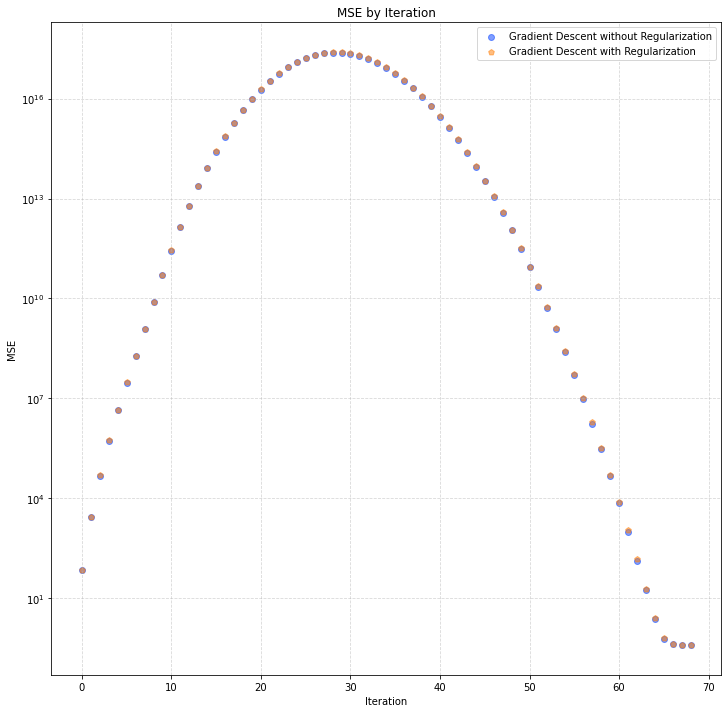

In [53]:
fig, ax = plt.subplots(figsize=(12,12))

ax.set_title('MSE by Iteration')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration')
ax.scatter(x=range(len(GD.loss_history)), y=GD.loss_history, marker='o', alpha = 0.5)
ax.scatter(x=range(len(GD_reg.loss_history)), y=GD_reg.loss_history, marker='p', alpha = 0.5)
ax.legend(['Gradient Descent without Regularization','Gradient Descent with Regularization'])
# при логарифмическом масштабе график выглядит нагляднее
plt.yscale('log')
plt.grid(linestyle='--', alpha=0.5)

plt.show()

По данным видно, что для `Gradient Descent` лучшей регуляризацией является ее отсутствие. Именно поэтому наша модель выбрала наименьшее значение $\alpha$. Вместе с тем, $\lambda$ для метода с регуляризаций и без одинакова.

In [45]:
# Логарифмическая сетка alpha
log_net_alpha = np.logspace(np.log(0.001), np.log(1), num = 10, base = np.e)
# Логарифмическая сетка lambda
log_net_lambda = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым плохим MSE будет значение равное 1000
Best_MSE = 1000
# Stochastic Gradient Descent with Regularization
for alpha in log_net_alpha:
    for lambda_ in log_net_lambda:
        SGD_reg = LinearRegression(StochasticDescentReg(w0, lambda_, mu = alpha))
        SGD_reg.fit(train_features.values, train_target.values)
        prediction = SGD_reg.predict(validation_features.values)
        MSE = mean_squared_error(validation_target.values, prediction)
        if MSE < Best_MSE:
            Best_MSE = MSE
            Best_alpha_for_SGD = alpha
            Best_lambda_for_SGD_reg = lambda_

# Обучим метод с наилучшими параметрами alpha и lambda
SGD_reg = LinearRegression(StochasticDescentReg(w0, Best_lambda_for_SGD_reg, Best_alpha_for_SGD))
SGD_reg.fit(train_features.values, train_target.values)
prediction = SGD_reg.predict(test_features.values)

# Запишем значения R^2 и MSE
R2_SGD_reg = r2_score(test_target, prediction)
MSE_SGD_reg = mean_squared_error(test_target, prediction)

# Сравним MSE и R^2
print('Best alpha - {}'.format(Best_alpha_for_SGD))
print('Best lambda without regularization - {} vs {} - Best lambda with regularization'.format(Best_lambda_for_SGD,
                                                                                               Best_lambda_for_SGD_reg))
print('R^2 score without regularization - {} vs {} - R^2 score with regularization'.format(R2_SGD, R2_SGD_reg))
print('MSE score without regularization - {} vs {} - MSE score with regularization'.format(MSE_SGD, MSE_SGD_reg))

Best alpha - 0.21544346900318836
Best lambda without regularization - 0.059160797830996176 vs 0.33999863583123174 - Best lambda with regularization
R^2 score without regularization - -4.752178726907487 vs -1.1162504411893188 - R^2 score with regularization
MSE score without regularization - 6.736660497203193 vs 2.478445372821984 - MSE score with regularization


Построим график, которой наглядно покажет значение функции потерь для метода с регуляризации и без него.

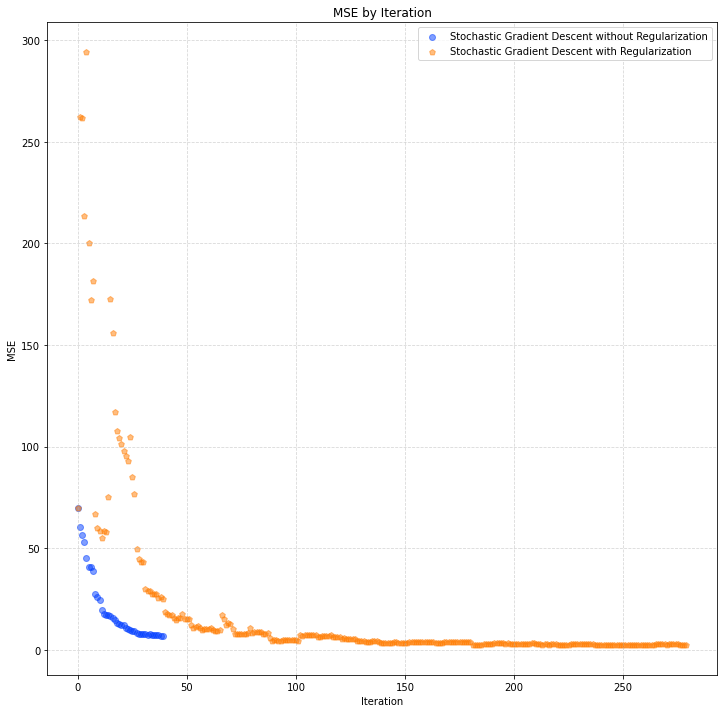

In [52]:
fig, ax = plt.subplots(figsize=(12,12))

ax.set_title('MSE by Iteration')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration')
ax.scatter(x=range(len(SGD.loss_history)), y=SGD.loss_history, marker='o', alpha = 0.5)
ax.scatter(x=range(len(SGD_reg.loss_history)), y=SGD_reg.loss_history, marker='p', alpha = 0.5)
ax.legend(['Stochastic Gradient Descent without Regularization','Stochastic Gradient Descent with Regularization'])
plt.grid(linestyle='--', alpha=0.5)

plt.show()

Для `Stochastic Gradient` все зависит от случая, поскольку данные каждый раз выбираются случайным образом, то результат может быть разным. Иногда оказывается, что лучше использовать регуляризацию, а иногда лучше этого не делать.
Если модель предпочитает использовать регуляризацию, то как правило и сходимость достигается дольше. Но в таком случае и результат получается лучше.

In [47]:
# Логарифмическая сетка alpha
log_net_alpha = np.logspace(np.log(0.001), np.log(1), num = 10, base = np.e)
# Логарифмическая сетка lambda
log_net_lambda = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым плохим MSE будет значение равное 1000
Best_MSE = 1000
# Momentum Descent with Regularization
for alpha in log_net_alpha:
    for lambda_ in log_net_lambda:
        MD_reg = LinearRegression(MomentumDescentReg(w0, lambda_, mu = alpha))
        MD_reg.fit(train_features, train_target)
        prediction = MD_reg.predict(validation_features)
        MSE = mean_squared_error(validation_target, prediction)
        if MSE < Best_MSE:
            Best_MSE = MSE
            Best_alpha_for_MD = alpha
            Best_lambda_for_MD_reg = lambda_

# Обучим метод с наилучшими параметрами alpha и lambda
MD_reg = LinearRegression(MomentumDescentReg(w0, Best_lambda_for_MD_reg, Best_alpha_for_MD))
MD_reg.fit(train_features, train_target)
prediction = MD_reg.predict(test_features)

# Запишем значения R^2 и MSE
R2_MD_reg = r2_score(test_target, prediction)
MSE_MD_reg = mean_squared_error(test_target, prediction)

# Сравним MSE и R^2
print('Best alpha - {}'.format(Best_alpha_for_MD))
print('Best lambda without regularization - {} vs {} - Best lambda with regularization'.format(Best_lambda_for_MD,
                                                                                               Best_lambda_for_MD_reg))
print('R^2 score without regularization - {} vs {} - R^2 score with regularization'.format(R2_MD, R2_MD_reg))
print('MSE score without regularization - {} vs {} - MSE score with regularization'.format(MSE_MD, MSE_MD_reg))

Best alpha - 0.0010000000000000007
Best lambda without regularization - 3.5 vs 3.5 - Best lambda with regularization
R^2 score without regularization - 0.6660126685106343 vs 0.6212963997738548 - R^2 score with regularization
MSE score without regularization - 0.3911490531554383 vs 0.4435184831545889 - MSE score with regularization


Построим график, которой наглядно покажет значение функции потерь для метода с регуляризации и без него.

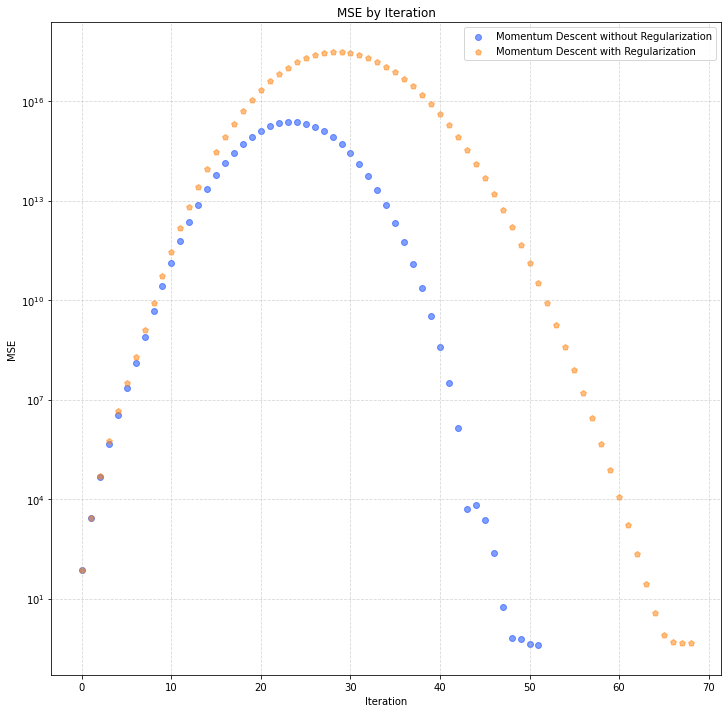

In [54]:
fig, ax = plt.subplots(figsize=(12,12))

ax.set_title('MSE by Iteration')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration')
ax.scatter(x=range(len(MD.loss_history)), y=MD.loss_history, marker='o', alpha = 0.5)
ax.scatter(x=range(len(MD_reg.loss_history)), y=MD_reg.loss_history, marker='p', alpha = 0.5)
ax.legend(['Momentum Descent without Regularization','Momentum Descent with Regularization'])
# при логарифмическом масштабе график выглядит нагляднее
plt.yscale('log')
plt.grid(linestyle='--', alpha=0.5)

plt.show()

Для `Momentum Descent` лучше не использовать регуляризацию. 

In [49]:
# Логарифмическая сетка alpha
log_net_alpha = np.logspace(np.log(0.001), np.log(1), num = 10, base = np.e)
# Логарифмическая сетка lambda
log_net_lambda = np.logspace(np.log(0.001), np.log(3.5), num = 15, base = np.e)
# Пусть базовым плохим MSE будет значение равное 1000
Best_MSE = 1000
# Adagrad with Regularization
for alpha in log_net_alpha:
    for lambda_ in log_net_lambda:
        AdaG_reg = LinearRegression(AdagradReg(w0, lambda_, mu = alpha))
        AdaG_reg.fit(train_features, train_target)
        prediction = AdaG_reg.predict(validation_features)
        MSE = mean_squared_error(validation_target, prediction)
        if MSE < Best_MSE:
            Best_MSE = MSE
            Best_alpha_for_AdaG = alpha
            Best_lambda_for_AdaG_reg = lambda_

# Обучим метод с наилучшими параметрами alpha и lambda
AdaG_reg = LinearRegression(AdagradReg(w0, Best_lambda_for_AdaG_reg, Best_alpha_for_AdaG))
AdaG_reg.fit(train_features, train_target)
prediction = AdaG_reg.predict(test_features)

# Запишем значения R^2 и MSE
R2_AdaG_reg = r2_score(test_target, prediction)
MSE_AdaG_reg = mean_squared_error(test_target, prediction)

# Сравним MSE и R^2
print('Best alpha - {}'.format(Best_alpha_for_AdaG))
print('Best lambda without regularization - {} vs {} - Best lambda with regularization'.format(Best_lambda_for_AdaG,
                                                                                               Best_lambda_for_AdaG_reg))
print('R^2 score without regularization - {} vs {} - R^2 score with regularization'.format(R2_AdaG, R2_AdaG_reg))
print('MSE score without regularization - {} vs {} - MSE score with regularization'.format(MSE_AdaG, MSE_AdaG_reg))

Best alpha - 0.0010000000000000007
Best lambda without regularization - 3.5 vs 3.5 - Best lambda with regularization
R^2 score without regularization - 0.5446022443516063 vs 0.4183920282207304 - R^2 score with regularization
MSE score without regularization - 0.5333387950274769 vs 0.6811498102476973 - MSE score with regularization


Построим график, которой наглядно покажет значение функции потерь для метода с регуляризации и без него.

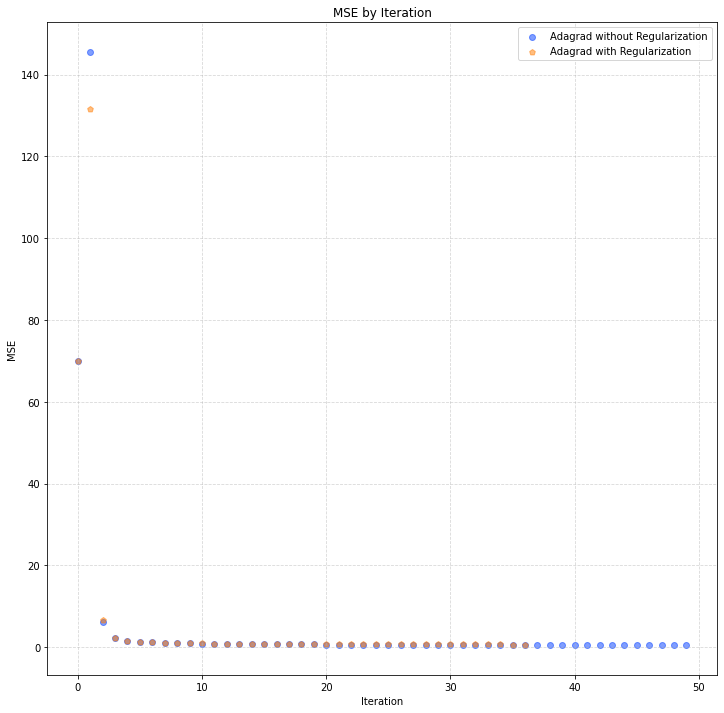

In [55]:
fig, ax = plt.subplots(figsize=(12,12))

ax.set_title('MSE by Iteration')
ax.set_ylabel('MSE')
ax.set_xlabel('Iteration')
ax.scatter(x=range(len(AdaG.loss_history)), y=AdaG.loss_history, marker='o', alpha = 0.5)
ax.scatter(x=range(len(AdaG_reg.loss_history)), y=AdaG_reg.loss_history, marker='p', alpha = 0.5)
ax.legend(['Adagrad without Regularization','Adagrad with Regularization'])
plt.grid(linestyle='--', alpha=0.5)

plt.show()

Для `Adaptive Gradient Descent` лучше не регуляризовывать модель. Однако с регуляризацией модель сходится быстрее (но результаты хуже).

На основании полученных данных можно сделать вывод, что в общем случае лучше на наших данных модель не регуляризовывать. Отдельно следует рассматривать `Stochastic Gradient Descent`, для этого метода все исключительно зависит от случая. Только этот метод выбрал другую $\lambda$ (в отличии от модели без регуляризации) и решил использовать регуляризацию.

Поскольку модели в большинстве своем выбрали отсутствие регуляризации, можно сказать, что регуляризация в нашем случае негативно влияет значение функции ошибки. 

Выбор в пользу отсутствия регуляризации можно объяснить тем, что мы не выделяли большого количества признаков при обработке данных и каждый из выделенных признаков вносит ощутимый вклад в наши модели. Поэтому наши модели предпочитают оставаться без регуляризации.

Следует отметить, что при регуляризации `Stochastic Gradient`, `Momentum Descent`, `Adaptive Gradient Descent` имеют значения функции ошибки и $R^2$ хуже, чем без регуляризации. 

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

In [ ]:
# YOUR CODE:

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.